In [13]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten

#preprocessing training data
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_set=train_datagen.flow_from_directory('dataset/training_set',batch_size=32,class_mode='binary',target_size=(64,64))

#preprocessing test data
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('dataset/test_set',batch_size=32,class_mode='binary',target_size=(64,64))

#initialize cnn
cnn=Sequential()

#1st convolutional & pooling layer
cnn.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=[64,64,3]))
cnn.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))

#2nd convolutional & pooling layer
cnn.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
cnn.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))

#3rd convolutional & pooling layer
cnn.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
cnn.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))

#flatten layer
cnn.add(Flatten())

#full connection layer
cnn.add(Dense(units=128,activation="relu"))

#output layer
cnn.add(Dense(units=1,activation="sigmoid"))

#compile cnn
cnn.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

#fitting cnn
cnn.fit_generator(train_set,epochs=10,steps_per_epoch=8000,validation_data=test_set,validation_steps=2000)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.

Epoch 1/10
8000/8000 [==============================] - 2450s 306ms/step - loss: 0.4040 - accuracy: 0.8076 - val_loss: 0.1949 - val_accuracy: 0.8569
Epoch 2/10
8000/8000 [==============================] - 2328s 291ms/step - loss: 0.2186 - accuracy: 0.9079 - val_loss: 0.7203 - val_accuracy: 0.8453
Epoch 3/10
8000/8000 [==============================] - 2271s 284ms/step - loss: 0.1274 - accuracy: 0.9490 - val_loss: 0.6786 - val_accuracy: 0.8474
Epoch 4/10
8000/8000 [==============================] - 2420s 302ms/step - loss: 0.0881 - accuracy: 0.9665 - val_loss: 1.8262 - val_accuracy: 0.8487
Epoch 5/10
8000/8000 [==============================] - 3622s 453ms/step - loss: 0.0690 - accuracy: 0.9747 - val_loss: 0.7057 - val_accuracy: 0.8466
Epoch 6/10
8000/8000 [==============================] - 2986s 373ms/step - loss: 0.0580 - accuracy: 0.9789 - val_loss: 1.0759 - val_accuracy: 0.8417
Epoch 7/10
8000/8000 

It is a cat


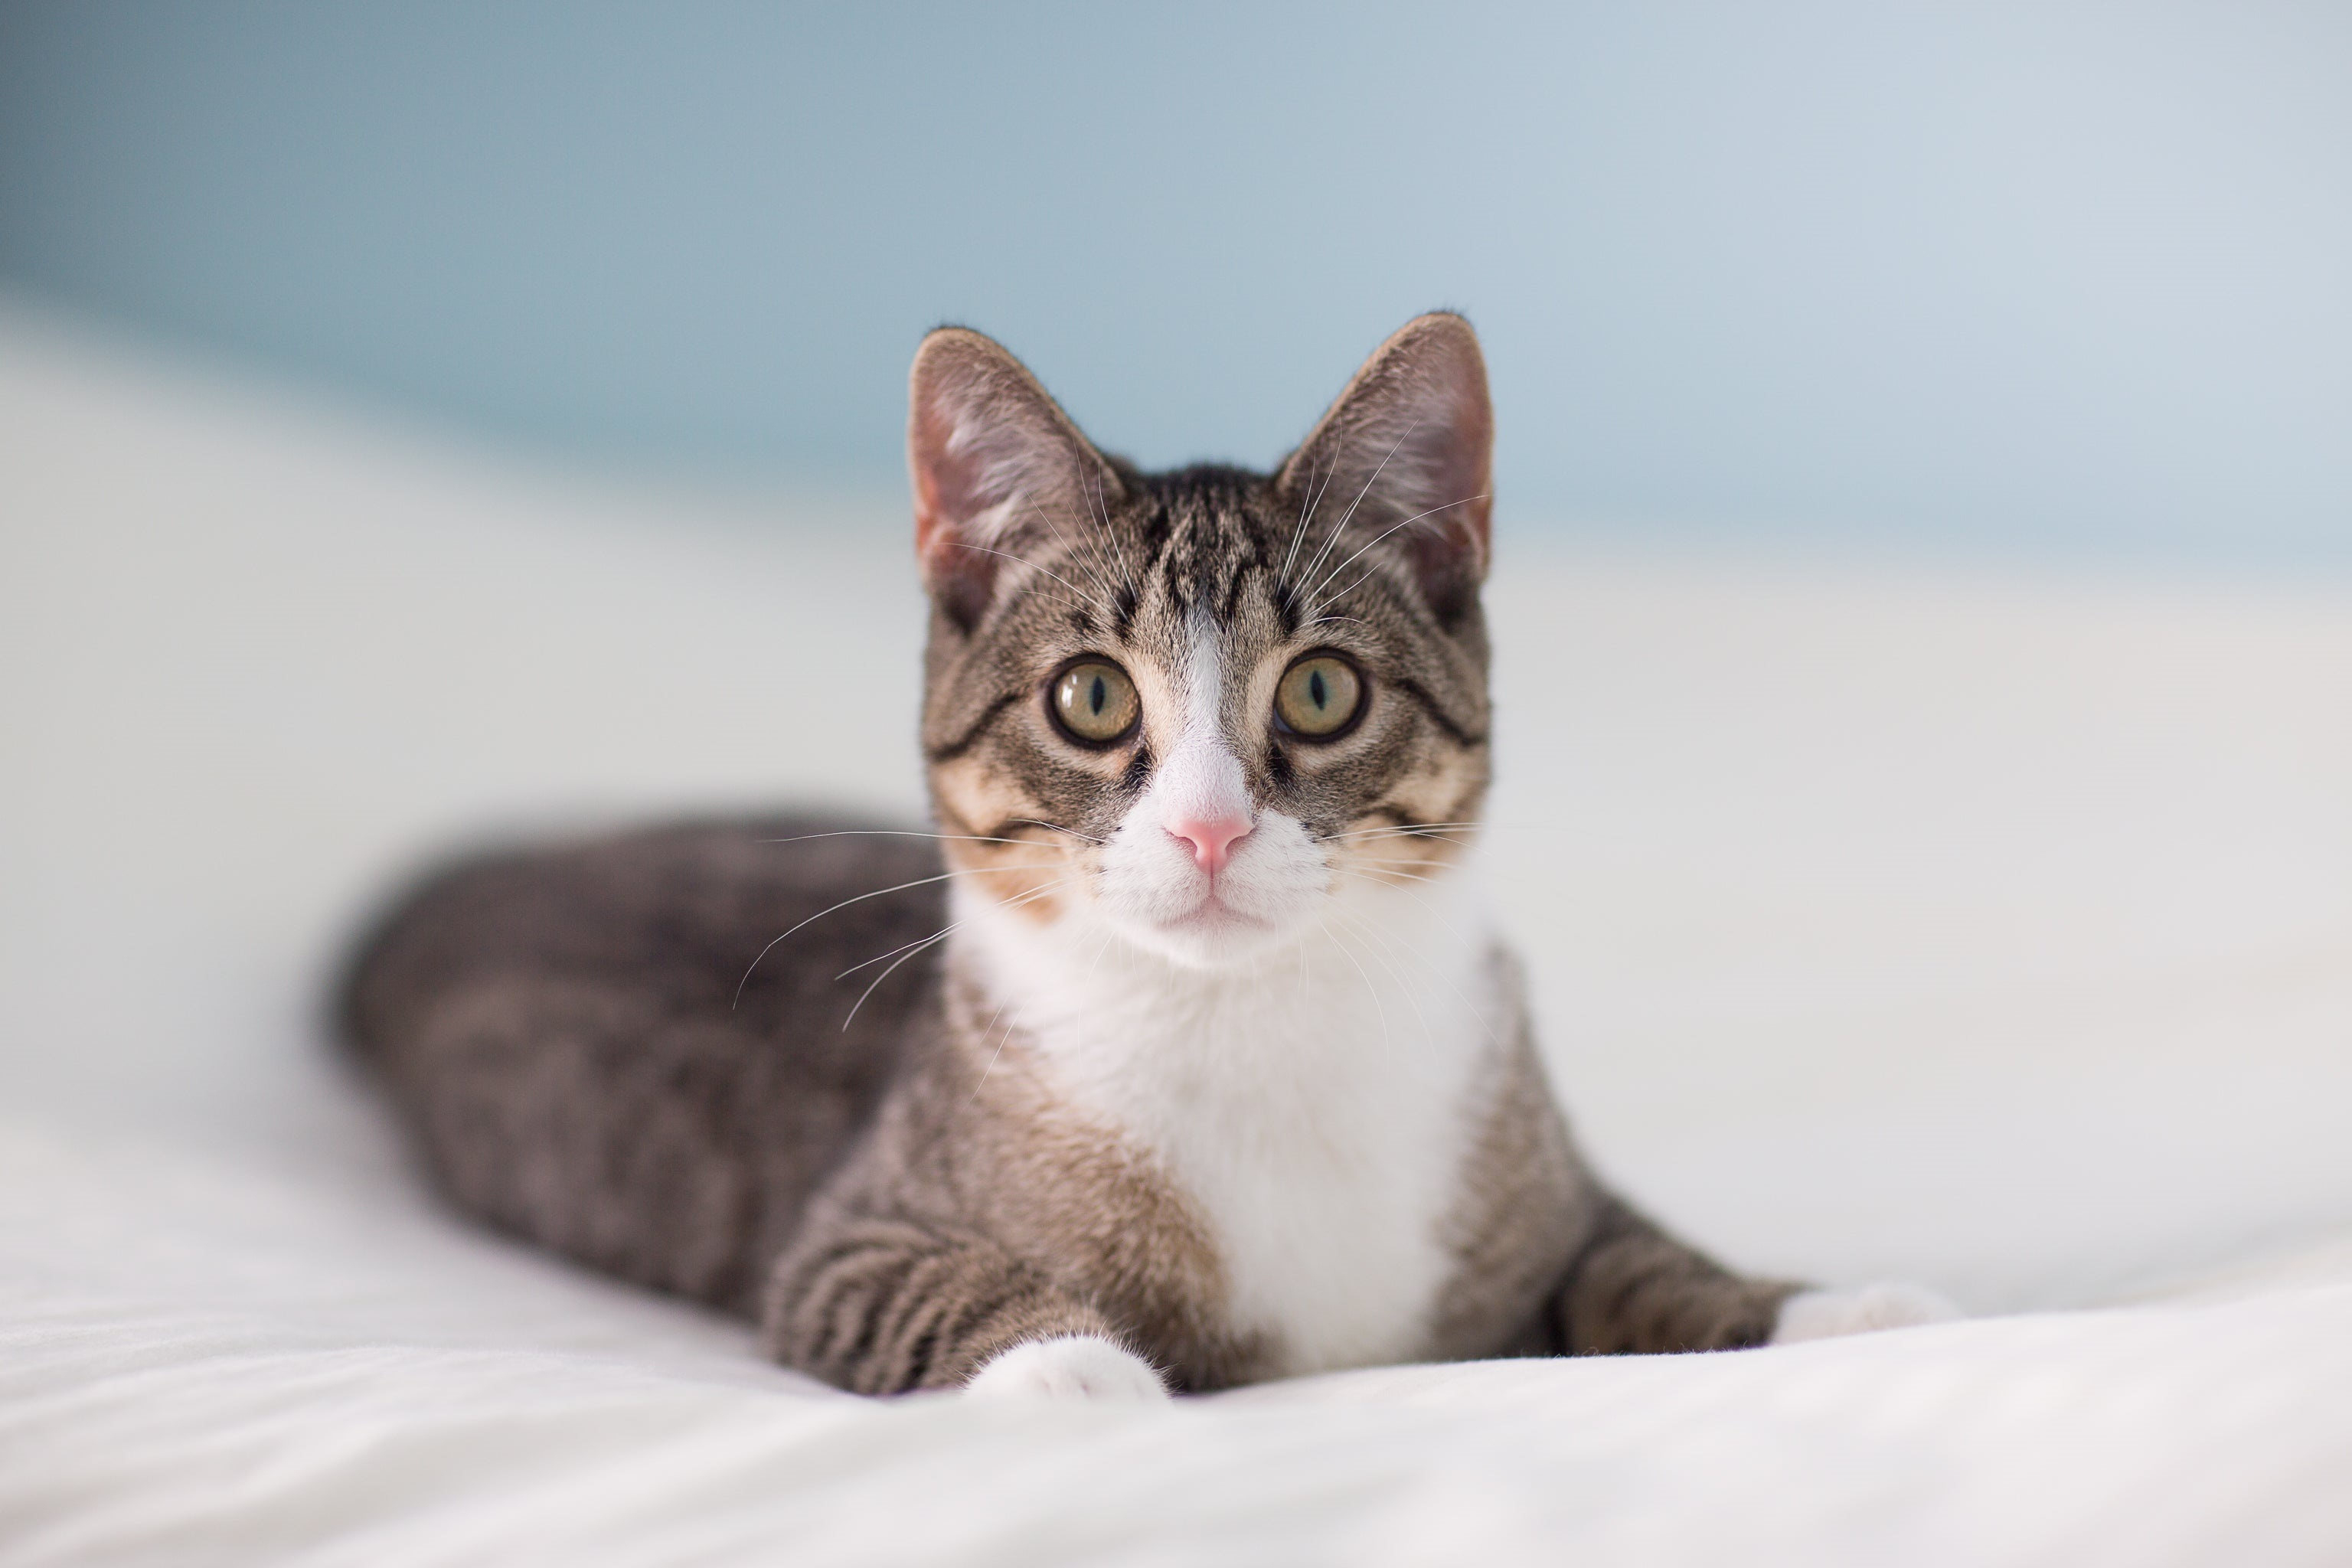

In [37]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image
path="dataset/single_prediction/paint.jpg"
images = image.load_img(path,target_size=(64,64))
images = image.img_to_array(images)
images = np.expand_dims(images,axis=0)
prediction = cnn.predict(images)
train_set.class_indices
if (prediction == 1):
    print("It is a dog")
else:
    print("It is a cat")
Image(path,height=500,width=500)